In [35]:
# ------------------ Importing Libraries ------------------

# Pandas: used for data manipulation and analysis, especially with tables (DataFrames)
import pandas as pd

# NumPy: provides support for large, multi-dimensional arrays and matrices, along with mathematical functions
import numpy as np

# Matplotlib: a plotting library used for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Seaborn: built on matplotlib, provides a high-level interface for drawing attractive statistical graphics
import seaborn as sns

# LabelEncoder: used to convert categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# train_test_split: splits data into training and testing sets
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier: used to create and train decision tree models
from sklearn.tree import DecisionTreeClassifier

# precision_score, recall_score, f1_score: metrics to evaluate classification model performance
from sklearn.metrics import precision_score, recall_score, f1_score

# tree: provides functions for visualizing decision trees
from sklearn import tree

# classification_report: generates a detailed report including precision, recall, f1-score for each class
from sklearn.metrics import classification_report

# confusion_matrix, ConfusionMatrixDisplay: for creating and displaying confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score




In [36]:
#load iris dataset
df = sns.load_dataset('iris')

In [37]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [38]:
# Get statistical summary of numeric columns (mean, std, min, max, etc.)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
# Check for any missing values in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [40]:
# ------------------ Encode the target column ------------------

# LabelEncoder is used to convert categorical labels into numeric form
# This is necessary because most machine learning algorithms require numeric input

# Create an instance of LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


In [41]:
# 3. Define features and target
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [42]:
# 4. Split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=42)
# create the model 
model = DecisionTreeClassifier()
# train the model 
model.fit(x_train,y_train)
# predict the model
y_pred = model.predict(x_test)
# print the accurancy of this model
print('accurancy',accuracy_score(y_test,y_pred))

accurancy 0.9333333333333333


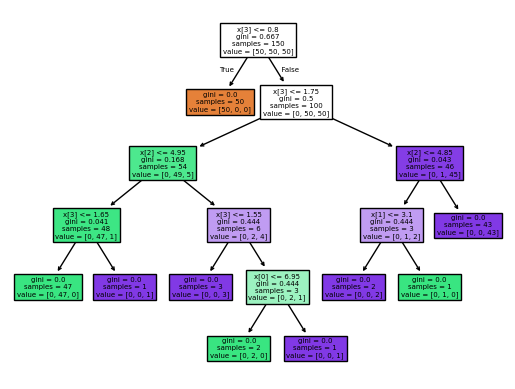

<Figure size 640x480 with 0 Axes>

In [43]:
# ------------------ Visualize the Decision Tree ------------------

# Fit the decision tree model on the dataset (x = features, y = target)
# and immediately plot it using tree.plot_tree
# filled=True adds colors to nodes based on class, making it easier to interpret
tree.plot_tree(model.fit(x, y), filled=True)

# Display the plot in an interactive window
plt.show()

# Save the plot as an image file named "tree.png" in the current directory
plt.savefig("tree.png")

In [44]:
# ------------------ Evaluate Model Performance ------------------

# Option 1: Use 'macro' average
# 'macro' calculates the metric independently for each class, then takes the average.
# This treats all classes equally, regardless of class imbalance.

# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision Score:", precision)
# Precision measures how many of the predicted positive cases were actually correct.
# High precision means few false positives.

# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall Score:", recall)
# Recall measures how many of the actual positive cases were correctly predicted.
# High recall means few false negatives.

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)
# F1 score is the harmonic mean of precision and recall.
# It balances precision and recall, useful when you want a single metric.


Precision Score: 0.9313063063063063
Recall Score: 0.930949167791273
F1 Score: 0.9307242465137202


In [45]:
# ------------------ Detailed Classification Report ------------------

# Generate a full classification report for the model's predictions
# This report includes precision, recall, F1-score, and support for each class
# 'support' is the number of true instances for each class
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.87      0.89        39
           2       0.88      0.92      0.90        38

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



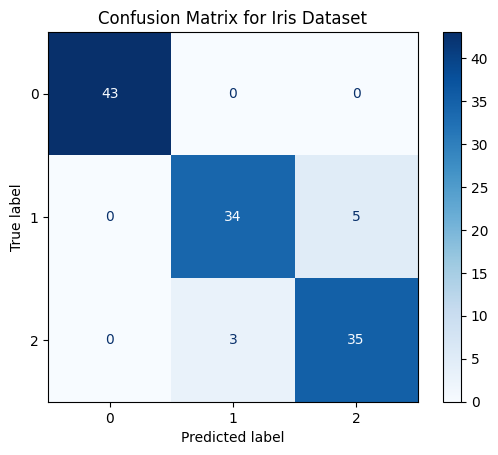

In [46]:
# Correct order: true labels first, predicted labels second
cm = confusion_matrix(y_test, y_pred)

# Display nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Iris Dataset")
plt.show()

<Axes: >

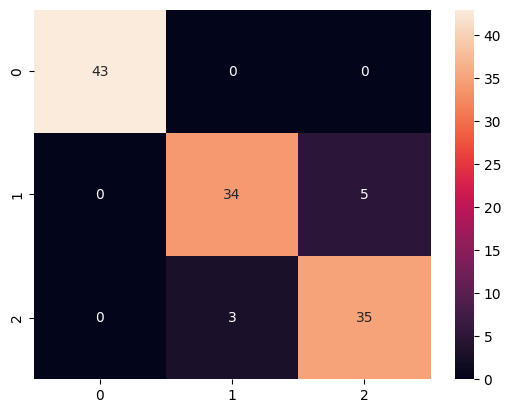

In [47]:
# Create a heatmap using seaborn
# annot=True displays the numbers inside each cell
sns.heatmap(cm, annot=True)

In [48]:
# save the model
import joblib

joblib.dump(model, "model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [50]:
import joblib

# Load the saved model
loaded_model = joblib.load("model.pkl")

# Predict (using your test data)
y_pred = loaded_model.predict(x_test)
print(y_pred)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1]
